<div style="
    background:#1f77b4;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
I/ PREPARE AND CLEANING DATA
</div>


<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
1. Import library and reading data
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display
import uuid

In [ ]:
df=pd.read_csv('/kaggle/input/portfolio/ecommerce_customer_churn_dataset.csv',low_memory= False)

In [3]:
df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [4]:
df['Customer_id'] = [str(uuid.uuid4()) for _ in range(len(df))]
df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Customer_id
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1,6606de2c-7ddd-46cb-9a5d-580f9b38a2c5
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4,f544f2f8-ae10-422c-b681-7075f3de2b49
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4,727a4e02-9914-43ff-a6e9-2f5c58645174
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1,a29e2097-3fa8-40c1-aca8-037b26b81274
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4,154034dc-56cc-4f77-b335-74e9e7a754eb


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Note:</strong> The columns have the correct data types (the "Churned" column can be kept as int64 for easier manipulation and "Payment_Method_Diversity" column can be float or category (optional))
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
2. Checking duplicate
</div>


In [6]:
num_duplicates = df.duplicated().sum()

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
3. Counting unique values
</div>

In [7]:
unique_counts = df.nunique()
unique_counts

Age                                 62
Gender                               3
Country                              8
City                                40
Membership_Years                   200
Login_Frequency                     46
Session_Duration_Avg               658
Pages_Per_Session                  224
Cart_Abandonment_Rate             1000
Wishlist_Items                      25
Total_Purchases                    150
Average_Order_Value              16407
Days_Since_Last_Purchase           235
Discount_Usage_Rate               1727
Returns_Rate                       394
Email_Open_Rate                    720
Customer_Service_Calls              21
Product_Reviews_Written             18
Social_Media_Engagement_Score      972
Mobile_App_Usage                   540
Payment_Method_Diversity             5
Lifetime_Value                   45447
Credit_Balance                    5234
Churned                              2
Signup_Quarter                       4
Customer_id              

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
4. Checking missing values
</div>

In [8]:
df.isnull().sum().loc[lambda x: x > 0].to_frame(name='Null_Count').assign(
            Null_Percent = lambda x: (x['Null_Count'] / len(df) * 100).round(1)
            ).sort_values('Null_Percent', ascending=False)

,Null_Count,Null_Percent
Social_Media_Engagement_Score,6000,12.0
Credit_Balance,5500,11.0
Mobile_App_Usage,5000,10.0
Returns_Rate,4491,9.0
Wishlist_Items,4000,8.0
Discount_Usage_Rate,3500,7.0
Product_Reviews_Written,3500,7.0
Session_Duration_Avg,3399,6.8
Pages_Per_Session,3000,6.0
Days_Since_Last_Purchase,3000,6.0


<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
5. Creating continuos variables
</div>

In [9]:
continuous_var = df.select_dtypes(include=['float64','int64']).columns
print("Continuous variable:", list(continuous_var))

Continuous variable: ['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written', 'Social_Media_Engagement_Score', 'Mobile_App_Usage', 'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance', 'Churned']



--- Age ---
count    47505.000000
mean        37.802968
std         11.834668
min          5.000000
25%         29.000000
50%         38.000000
75%         46.000000
max        200.000000
Name: Age, dtype: float64
Number of outliers: 126 (0.27%)
'Age' is approximately symmetric
'Age' is leptokurtic (peaked)


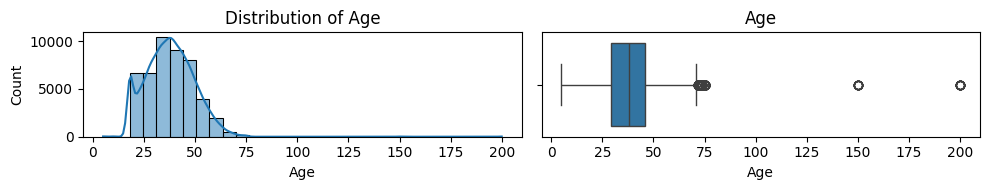


--- Membership_Years ---
count    50000.000000
mean         2.984009
std          2.059105
min          0.100000
25%          1.400000
50%          2.500000
75%          4.000000
max         10.000000
Name: Membership_Years, dtype: float64
Number of outliers: 1581 (3.16%)
'Membership_Years' is right-skewed
'Membership_Years' is leptokurtic (peaked)


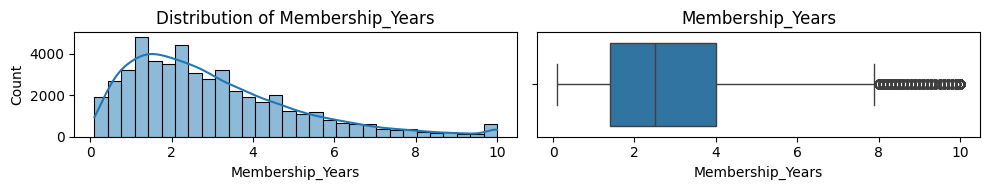


--- Login_Frequency ---
count    50000.000000
mean        11.624660
std          7.810657
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         46.000000
Name: Login_Frequency, dtype: float64
Number of outliers: 309 (0.62%)
'Login_Frequency' is approximately symmetric
'Login_Frequency' is platykurtic (flat)


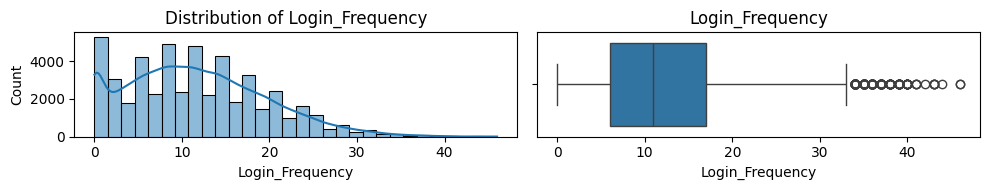


--- Session_Duration_Avg ---
count    46601.000000
mean        27.660754
std         10.871013
min          1.000000
25%         19.700000
50%         26.800000
75%         34.700000
max         75.600000
Name: Session_Duration_Avg, dtype: float64
Number of outliers: 300 (0.64%)
'Session_Duration_Avg' is approximately symmetric
'Session_Duration_Avg' is platykurtic (flat)


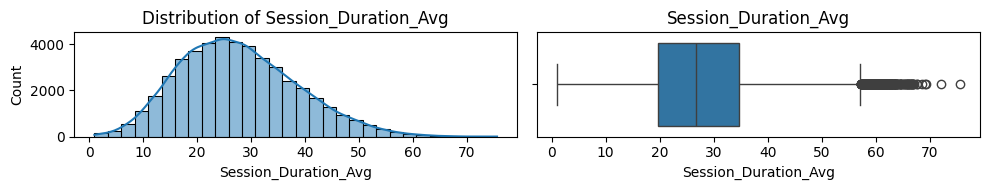


--- Pages_Per_Session ---
count    47000.000000
mean         8.737811
std          3.778220
min          1.000000
25%          6.000000
50%          8.400000
75%         11.200000
max         24.100000
Name: Pages_Per_Session, dtype: float64
Number of outliers: 275 (0.59%)
'Pages_Per_Session' is approximately symmetric
'Pages_Per_Session' is platykurtic (flat)


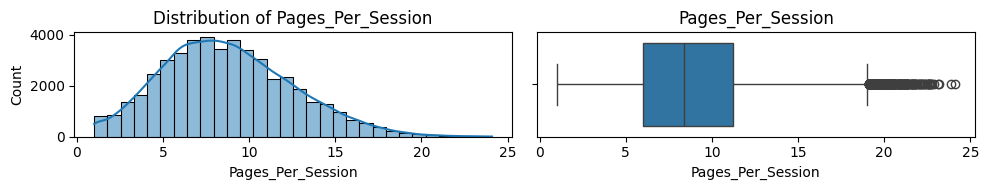


--- Cart_Abandonment_Rate ---
count    50000.000000
mean        57.079973
std         16.282723
min          0.000000
25%         46.400000
50%         58.100000
75%         68.700000
max        143.743350
Name: Cart_Abandonment_Rate, dtype: float64
Number of outliers: 323 (0.65%)
'Cart_Abandonment_Rate' is approximately symmetric
'Cart_Abandonment_Rate' is leptokurtic (peaked)


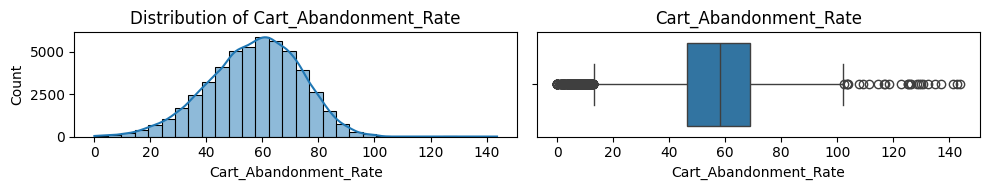


--- Wishlist_Items ---
count    46000.000000
mean         4.298391
std          3.189754
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: Wishlist_Items, dtype: float64
Number of outliers: 858 (1.87%)
'Wishlist_Items' is approximately symmetric
'Wishlist_Items' is leptokurtic (peaked)


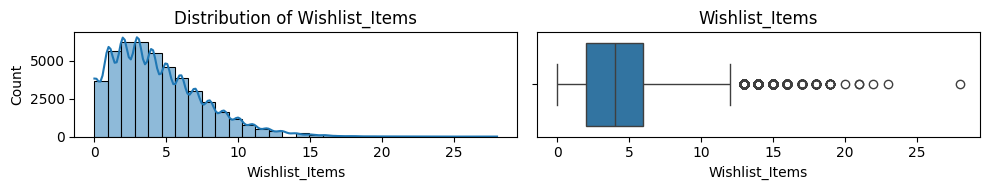


--- Total_Purchases ---
count    50000.000000
mean        13.111576
std          7.017312
min        -13.000000
25%          8.000000
50%         12.000000
75%         17.000000
max        128.700000
Name: Total_Purchases, dtype: float64
Number of outliers: 628 (1.26%)
'Total_Purchases' is right-skewed
'Total_Purchases' is leptokurtic (peaked)


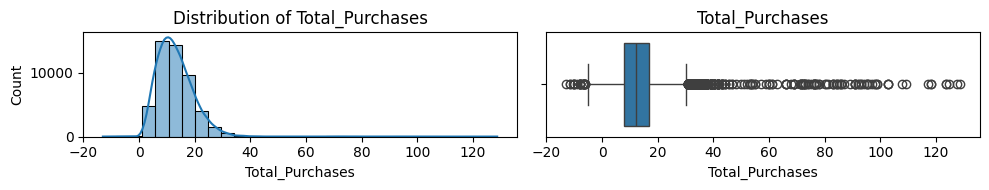


--- Average_Order_Value ---
count    50000.000000
mean       123.117330
std        175.569714
min         26.380000
25%         87.050000
50%        112.970000
75%        144.440000
max       9666.379178
Name: Average_Order_Value, dtype: float64
Number of outliers: 1005 (2.01%)
'Average_Order_Value' is right-skewed
'Average_Order_Value' is leptokurtic (peaked)


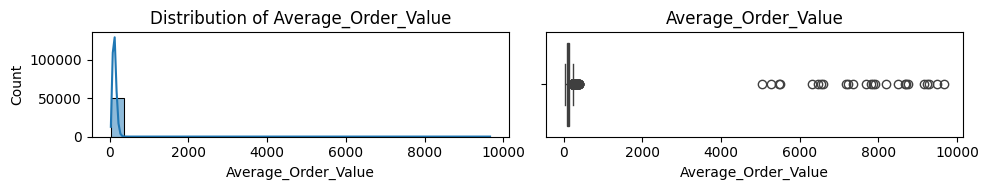


--- Days_Since_Last_Purchase ---
count    47000.000000
mean        29.792872
std         29.695062
min          0.000000
25%          9.000000
50%         21.000000
75%         41.000000
max        287.000000
Name: Days_Since_Last_Purchase, dtype: float64
Number of outliers: 2313 (4.92%)
'Days_Since_Last_Purchase' is right-skewed
'Days_Since_Last_Purchase' is leptokurtic (peaked)


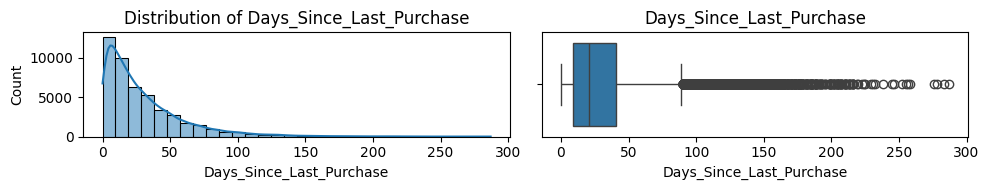


--- Discount_Usage_Rate ---
count    46500.000000
mean        41.997485
std         21.373642
min          0.240000
25%         25.300000
50%         40.200000
75%         57.000000
max        116.640000
Name: Discount_Usage_Rate, dtype: float64
Number of outliers: 101 (0.22%)
'Discount_Usage_Rate' is approximately symmetric
'Discount_Usage_Rate' is platykurtic (flat)


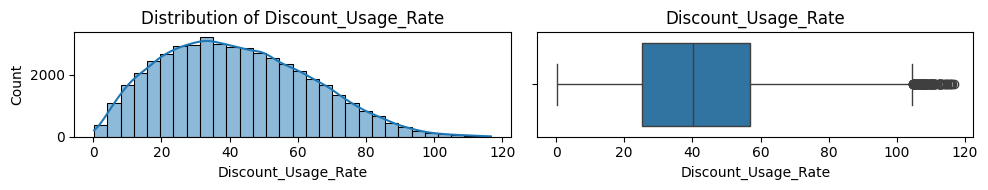


--- Returns_Rate ---
count    45509.000000
mean         6.680913
std          6.143027
min          0.000000
25%          2.900000
50%          5.400000
75%          9.100000
max         99.615734
Name: Returns_Rate, dtype: float64
Number of outliers: 1204 (2.65%)
'Returns_Rate' is right-skewed
'Returns_Rate' is leptokurtic (peaked)


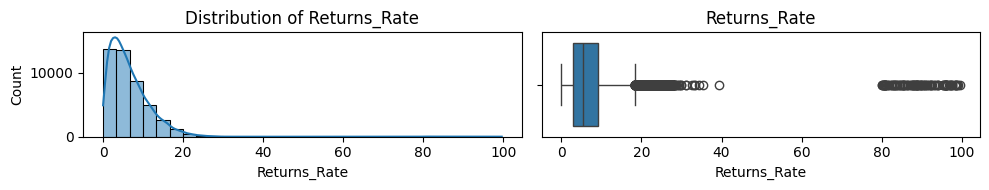


--- Email_Open_Rate ---
count    47472.000000
mean        20.937980
std         14.252561
min          0.000000
25%          9.900000
50%         19.700000
75%         30.400000
max         91.700000
Name: Email_Open_Rate, dtype: float64
Number of outliers: 238 (0.50%)
'Email_Open_Rate' is approximately symmetric
'Email_Open_Rate' is platykurtic (flat)


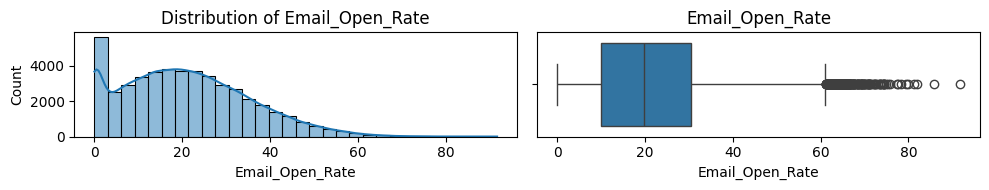


--- Customer_Service_Calls ---
count    49832.000000
mean         5.681831
std          2.676052
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: Customer_Service_Calls, dtype: float64
Number of outliers: 1185 (2.38%)
'Customer_Service_Calls' is approximately symmetric
'Customer_Service_Calls' is leptokurtic (peaked)


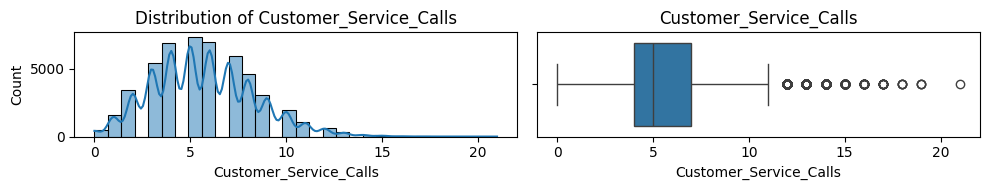


--- Product_Reviews_Written ---
count    46500.000000
mean         2.853312
std          2.328948
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: Product_Reviews_Written, dtype: float64
Number of outliers: 1090 (2.34%)
'Product_Reviews_Written' is right-skewed
'Product_Reviews_Written' is leptokurtic (peaked)


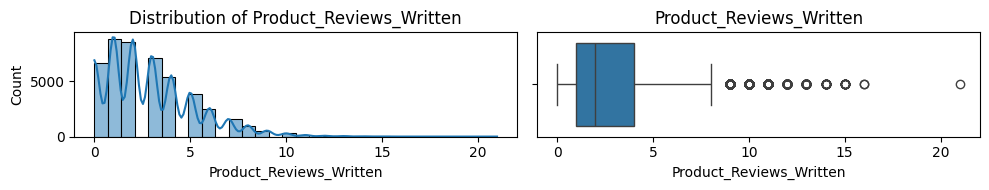


--- Social_Media_Engagement_Score ---
count    44000.000000
mean        29.364466
std         20.574021
min          0.000000
25%         13.200000
50%         27.600000
75%         43.100000
max        100.000000
Name: Social_Media_Engagement_Score, dtype: float64
Number of outliers: 233 (0.53%)
'Social_Media_Engagement_Score' is approximately symmetric
'Social_Media_Engagement_Score' is platykurtic (flat)


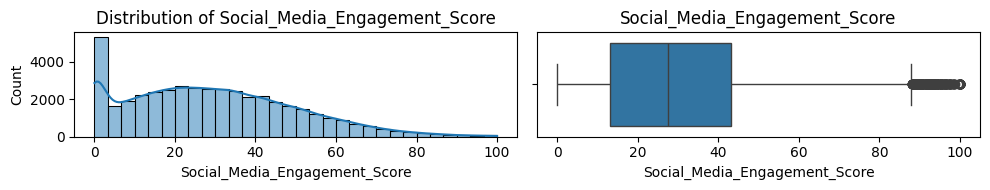


--- Mobile_App_Usage ---
count    45000.000000
mean        19.371607
std          9.419252
min          0.000000
25%         12.500000
50%         18.600000
75%         25.500000
max         61.900000
Name: Mobile_App_Usage, dtype: float64
Number of outliers: 270 (0.60%)
'Mobile_App_Usage' is approximately symmetric
'Mobile_App_Usage' is platykurtic (flat)


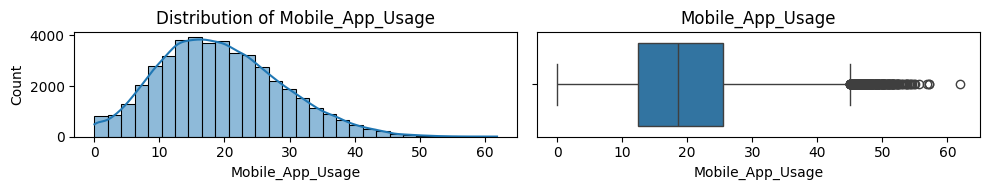


--- Payment_Method_Diversity ---
count    47500.000000
mean         2.353874
std          1.110012
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Payment_Method_Diversity, dtype: float64
Number of outliers: 2439 (5.13%)
'Payment_Method_Diversity' is approximately symmetric
'Payment_Method_Diversity' is platykurtic (flat)


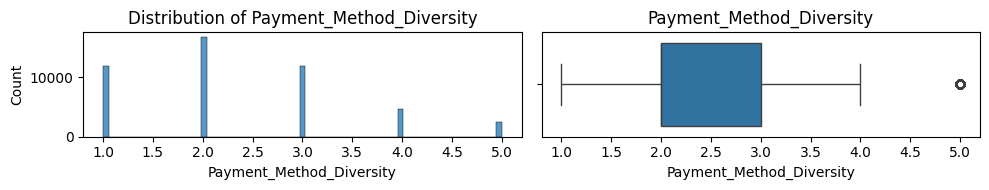


--- Lifetime_Value ---
count    50000.000000
mean      1440.626292
std        907.249443
min          0.000000
25%        789.817500
50%       1243.415000
75%       1874.000000
max       8987.240000
Name: Lifetime_Value, dtype: float64
Number of outliers: 1684 (3.37%)
'Lifetime_Value' is right-skewed
'Lifetime_Value' is leptokurtic (peaked)


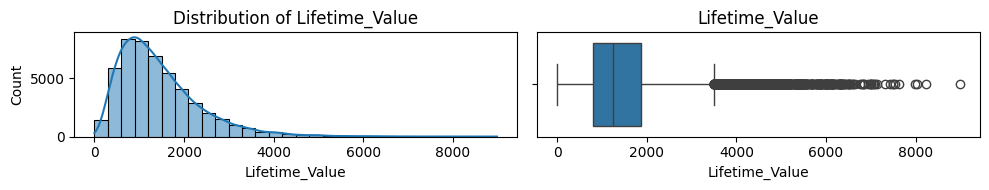


--- Credit_Balance ---
count    44500.000000
mean      1966.233258
std       1225.072166
min          0.000000
25%       1049.000000
50%       1896.000000
75%       2791.000000
max       7197.000000
Name: Credit_Balance, dtype: float64
Number of outliers: 209 (0.47%)
'Credit_Balance' is approximately symmetric
'Credit_Balance' is platykurtic (flat)


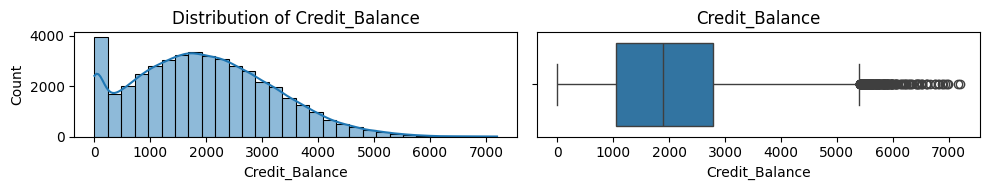


--- Churned ---
count    50000.000000
mean         0.289000
std          0.453302
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churned, dtype: float64
Number of outliers: 0 (0.00%)
'Churned' is approximately symmetric
'Churned' is platykurtic (flat)


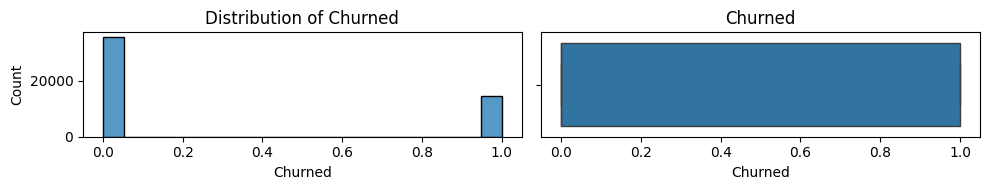

In [10]:
Numerical_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in Numerical_col:
    print(f"\n--- {col} ---")
    print(df[col].describe())

    # Caculating outlier (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outlier
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    outlier_percentage = (num_outliers / len(df[col].dropna())) * 100 if len(df[col].dropna()) > 0 else 0

    print(f"Number of outliers: {num_outliers} ({outlier_percentage:.2f}%)")

  # Skewness & Kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    # Skewness interpretation
    if skewness > 1:
        print(f"'{col}' is right-skewed")
    elif skewness < -1:
        print(f"'{col}' is left-skewed")
    else:
        print(f"'{col}' is approximately symmetric")

    # Kurtosis interpretation (excess kurtosis)
    if kurtosis > 0:
        print(f"'{col}' is leptokurtic (peaked)")
    elif kurtosis < 0:
        print(f"'{col}' is platykurtic (flat)")
    else:
        print(f"'{col}' is mesokurtic (normal-like)")

    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    if df[col].nunique() > 10:
        sns.histplot(df[col].dropna(), kde=True, bins=30)
    else:
        sns.histplot(df[col].dropna(), kde=False)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

    plt.tight_layout()
    plt.show()


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Customer behavior distributions are highly right-skewed</strong><br>
This is evident from the histograms of variables such as Login_Frequency and Total_Purchase, where most observations are concentrated at lower values with a long tail extending to higher values.<br>
<strong>Median values are relatively low compared to the maximum range</strong><br>
Boxplots show that the median lies closer to the lower quartile, while the distance between the median and the maximum is large, indicating strong dispersion in customer behavior.<br>
<strong>Upper outliers are present across multiple behavioral variables</strong><br>
The boxplots reveal several high-value outliers, representing a small subset of customers with significantly higher activity levels rather than data quality issues.<br>
<strong>The data does not follow a normal distribution</strong><br>
The asymmetric shapes of both histograms and boxplots suggest that assumptions of normality or purely mean-based summaries would be inappropriate for these variables.<br><br>
<em>*Do these variables move together, or are they independent dimensions of customer behavior?</em>
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
6. Filling missing values
</div>

In [11]:
# Clip & fill Age
df['Age'] = df['Age'].clip(18, 90)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Clip Total_Purchases
df['Total_Purchases'] = df['Total_Purchases'].clip(lower=0)

# Clip Cart_Abandonment_Rate
df['Cart_Abandonment_Rate'] = df['Cart_Abandonment_Rate'].clip(upper=100)


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
- <strong>Age</strong>: Abnormal when values are <18 or >90; however, the number of such cases is very small.<br>
- <strong>Total_purchases, Cart_Abandonment_Rate </strong>: Abnormal when values are negative; the number of such cases is small.<br><br>
  <strong>==></strong> Cap abnormal values at the maximum/minimum boundaries and fill NA values with the mean, because these two variables have a clearly right-skewed distribution and contain outliers.
</div>

In [12]:
behavior_cols = [
    'Wishlist_Items',
    'Product_Reviews_Written',
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Credit_Balance',
    'Discount_Usage_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Customer_Service_Calls',
    'Days_Since_Last_Purchase'
]

df[behavior_cols] = df[behavior_cols].fillna(0)

<table border="1" cellpadding="0" cellspacing="0" width="70%",margin:auto;>
  <tr>
    <th align="left">Feature</th>
    <th align="left">Business-meanings</th>
  </tr>
  <tr>
    <td><b>Wishlist_Items</b></td>
    <td>The customer has no wishlist.</td>
  </tr>
  <tr>
    <td><b>Product_Reviews_Written</b></td>
    <td>The customer has not written any reviews.</td>
  </tr>
  <tr>
    <td><b>Social_Media_Engagement_Score</b></td>
    <td>The customer does not engage on social media.</td>
  </tr>
  <tr>
    <td><b>Mobile_App_Usage</b></td>
    <td>The customer only uses the web platform.</td>
  </tr>
  <tr>
    <td><b>Credit_Balance</b></td>
    <td>The customer does not use store credit.</td>
  </tr>
  <tr>
    <td><b>Discount_Usage_Rate</b></td>
    <td>The customer has never used a discount.</td>
  </tr>
  <tr>
    <td><b>Returns_Rate</b></td>
    <td>The customer has never returned any items.</td>
  </tr>
  <tr>
    <td><b>Email_Open_Rate</b></td>
    <td>The customer has never opened marketing emails.</td>
  </tr>
  <tr>
    <td><b>Customer_Service_Calls</b></td>
    <td>The customer has never needed customer support.</td>
  </tr>
    
</table>


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
These variables represent optional behavioral attributes that depend on individual customers. Therefore, customers <strong>should not be forced</strong> to exhibit these behaviors. Filling missing values with 0 is appropriate and aligns with the business meaning.
</div>

In [13]:
median_cols = [
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Payment_Method_Diversity'
]

for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
The remaining variables have an approximately normal distribution and are platykurtic (flat), however, due to the presence of outliers, the <strong>median</strong> is the more reasonable choice.
</div>

In [14]:
df.isnull().sum()

Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Cart_Abandonment_Rate            0
Wishlist_Items                   0
Total_Purchases                  0
Average_Order_Value              0
Days_Since_Last_Purchase         0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Credit_Balance                   0
Churned                          0
Signup_Quarter                   0
Customer_id                      0
dtype: int64

In [15]:
df.to_csv('ecommerce_cust_data.csv', index=False, encoding='utf-8')

<div style="
    background:#1f77b4;
    color:white;
    padding:15px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
II/ MULTIVARIATE ANALYSIS
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:0px;
">
1. Continuous variable
</div>

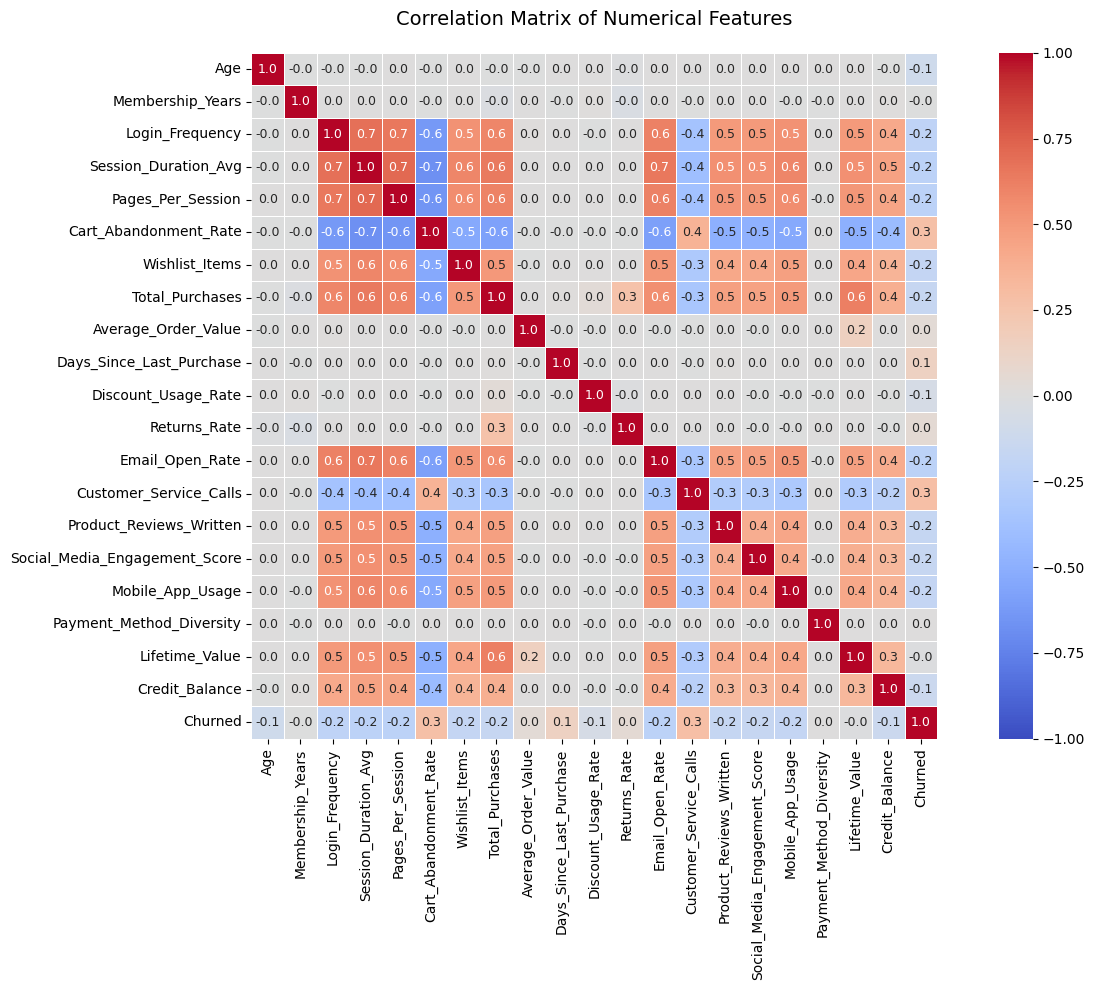


Found 12 pairs of variables with |Pearson| ≥ 0.6
                     var1                  var2  corr
0    Session_Duration_Avg       Login_Frequency   0.7
1       Pages_Per_Session       Login_Frequency   0.7
2       Pages_Per_Session  Session_Duration_Avg   0.7
4   Cart_Abandonment_Rate  Session_Duration_Avg   0.7
9         Email_Open_Rate  Session_Duration_Avg   0.7
3   Cart_Abandonment_Rate       Login_Frequency   0.6
6         Total_Purchases  Session_Duration_Avg   0.6
5   Cart_Abandonment_Rate     Pages_Per_Session   0.6
7         Total_Purchases     Pages_Per_Session   0.6
8         Email_Open_Rate       Login_Frequency   0.6
10        Email_Open_Rate     Pages_Per_Session   0.6
11         Lifetime_Value       Total_Purchases   0.6


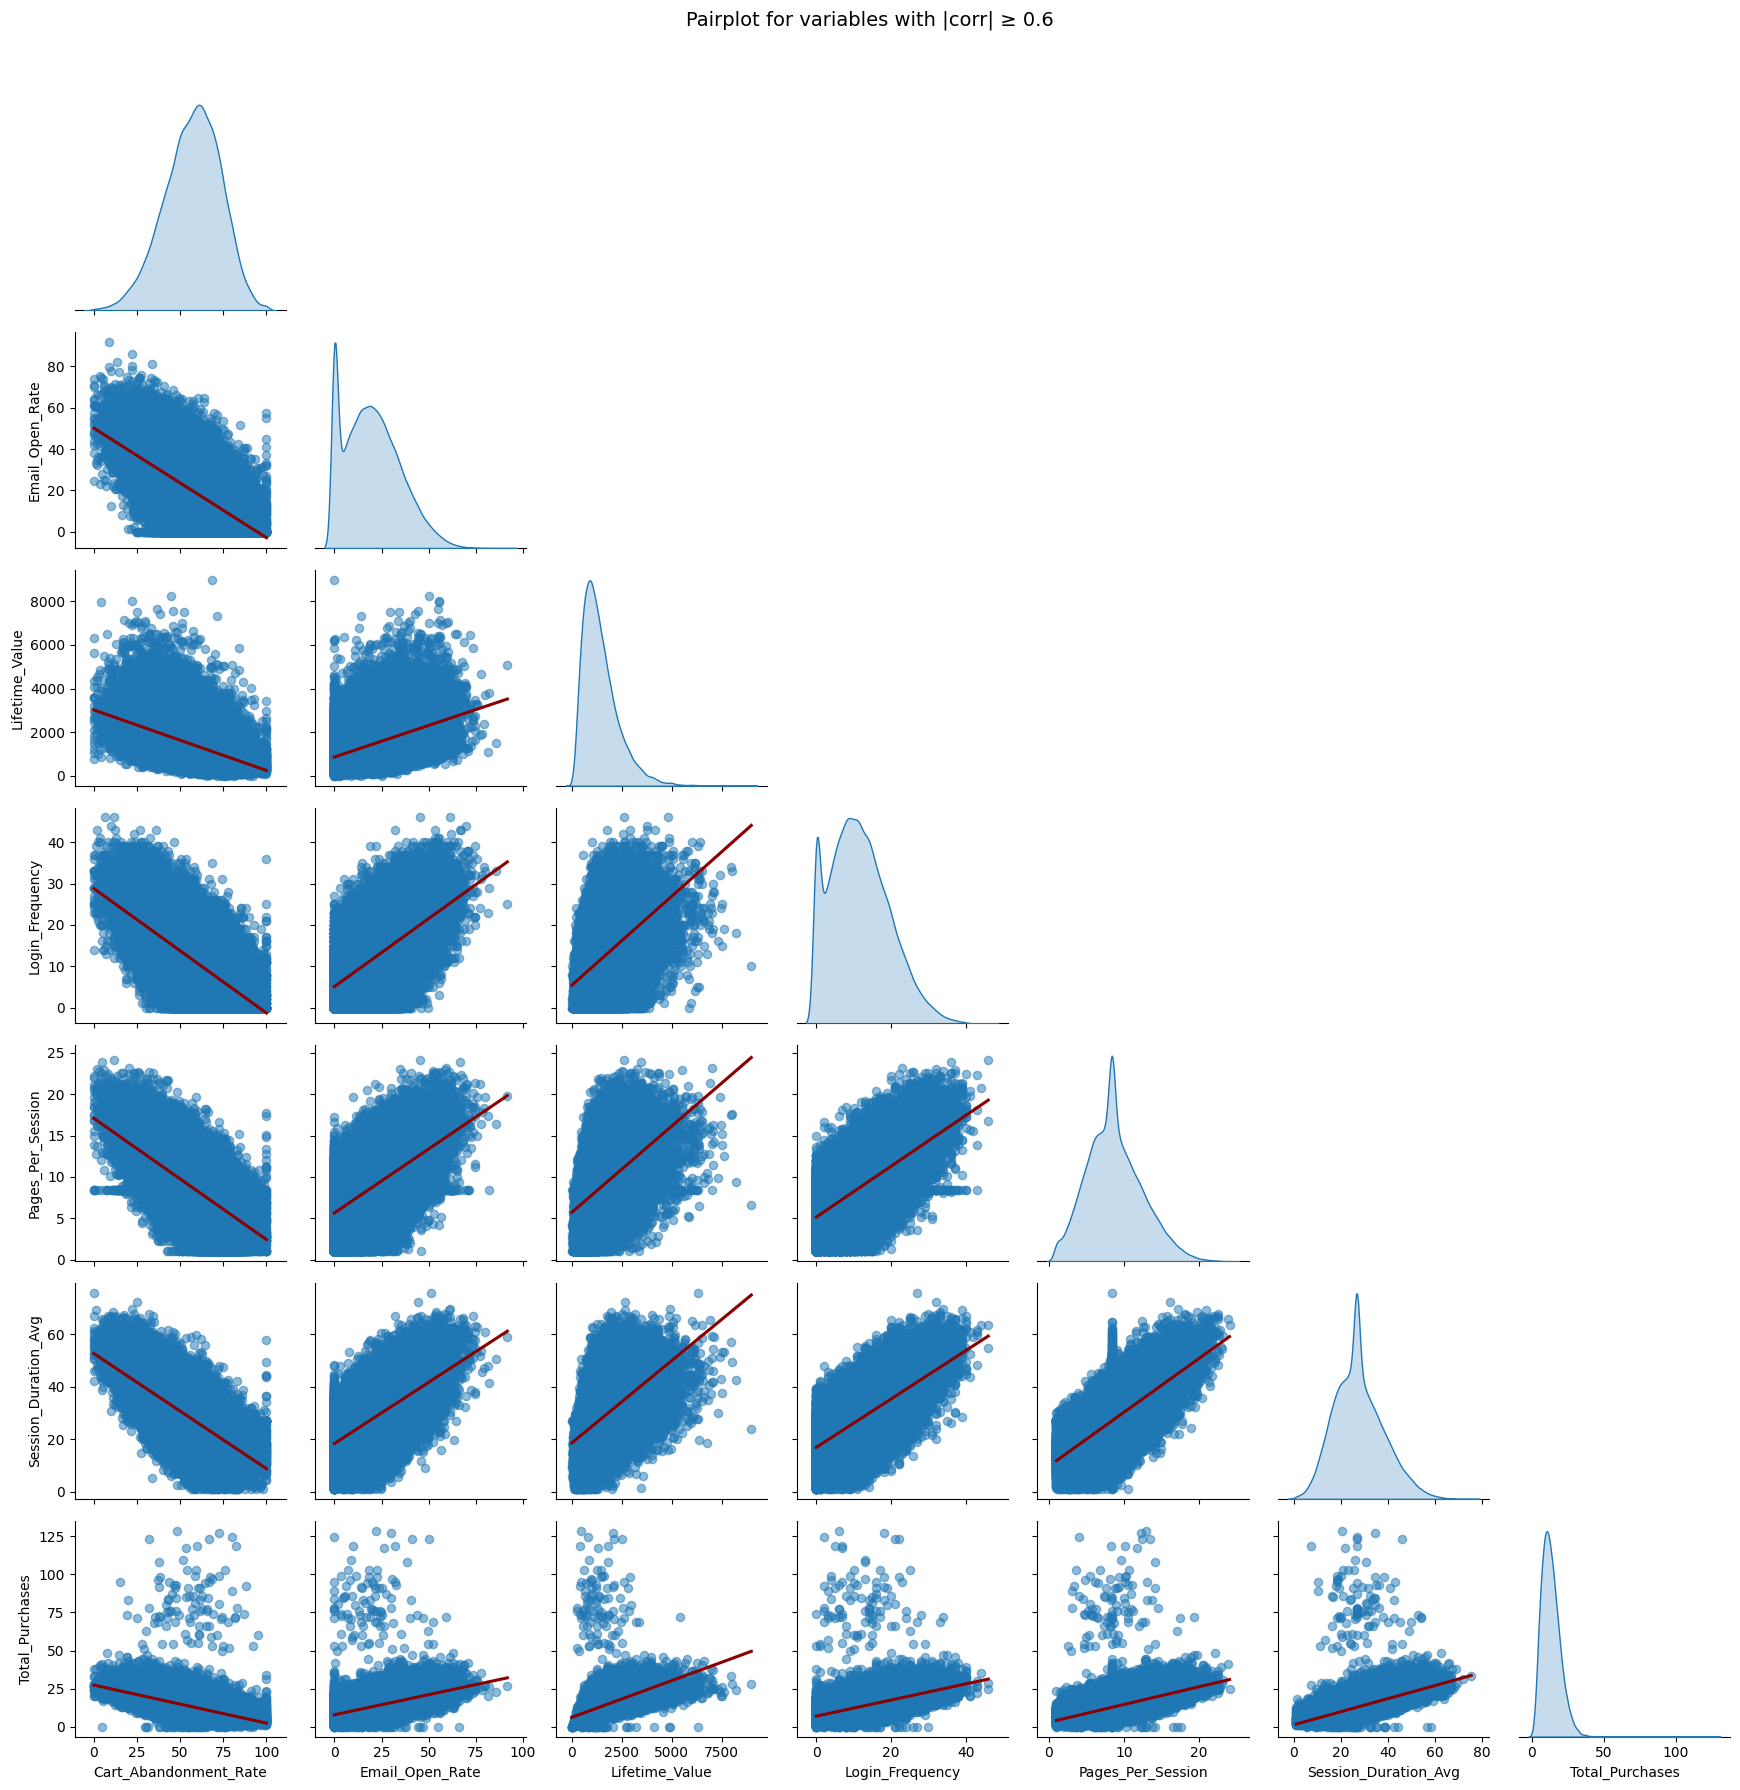

In [16]:
# Section 1: Heatmap corr

corr_matrix = df[continuous_var].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".1f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={"size": 9})

plt.title('Correlation Matrix of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# Section 2: Automatically find strong correlation pairs and plot pairplot
threshold = 0.6
corr_abs = corr_matrix.abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool))
strong_pairs = (
    corr_abs.where(~mask & (corr_abs >= threshold))
    .stack()
    .round(1)
    .reset_index()
    .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'corr'})
    .query('corr >= @threshold')
    .sort_values('corr', ascending=False)
)

if strong_pairs.empty:
    print(f"There are no pairs of variables with |Pearson correlation| ≥ {threshold}")
else:
    print(f"\nFound {len(strong_pairs)} pairs of variables with |Pearson| ≥ {threshold}")
    print(strong_pairs.round(3))
    
    # List strong pairs corr
    strong_vars = sorted(set(strong_pairs['var1']) | set(strong_pairs['var2']))
    
    if len(strong_vars) < 2:
        print("Not enough variables for pairplot (need at least 2).")
    else:
        # Ploting pair plot
        g = sns.pairplot(
            data=df[strong_vars],
            kind='reg',                   
            diag_kind='kde',              
            plot_kws={'scatter_kws': {'alpha':0.5, 's':35},
                      'line_kws': {'color':'darkred', 'lw':2.2}},
            corner=True,                  
            height=2.5                  
        )
        
        g.fig.suptitle(f"Pairplot for variables with |corr| ≥ {threshold}",
                       fontsize=14, y=1.02)
        
        g.fig.tight_layout()
        plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Correlation between total purchase and behavior </strong><br>  
Total_purchase has a positive linear relationship with usage frequency, as higher login frequency and session intensity generally align with higher purchase counts.<br>
Purchase behavior remains heterogeneous at similar engagement levels, with a small subset of customers achieving high total_purchase despite only low to medium activity frequency.<br>
<strong>Unified behavior pattern</strong><br> 
Strong correlations exist among engagement-related variables, indicating that login frequency, session duration, and pages per session tend to move together as a unified behavior pattern.<br><br>
<strong>==></strong> The multivariate analysis shows that while <strong>higher engagement</strong> is generally associated with <strong>increased purchasing</strong>, engagement alone does not fully explain purchase behavior. Customers with similar activity levels can exhibit significantly different purchasing outcomes, highlighting meaningful behavioral diversity within the dataset.<br><br>
<em>*How do customer behaviors differ between churned and non-churned customers?</em>
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
2. Correlation analysis between continuous variables and the target variable ("Churned")
</div>

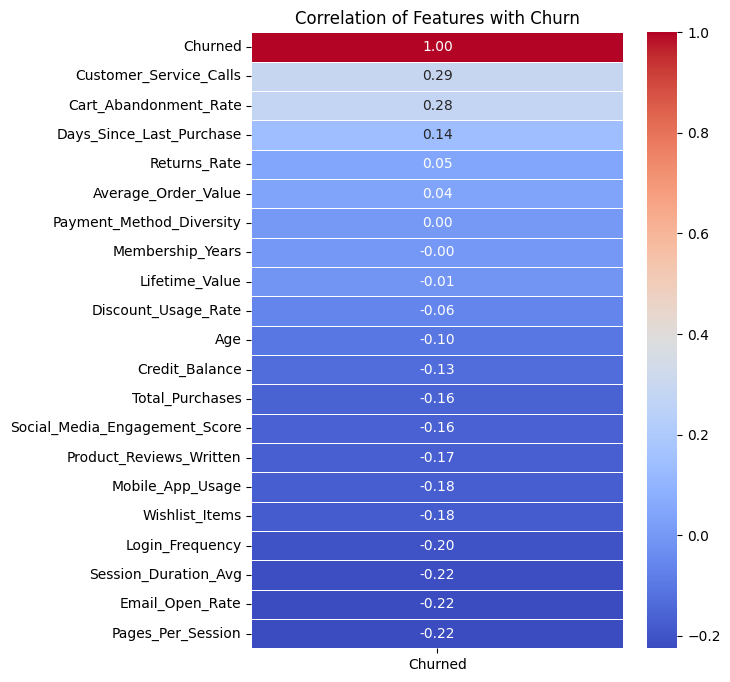


 Features |corr| >= threshold: ['Customer_Service_Calls', 'Cart_Abandonment_Rate', 'Login_Frequency', 'Session_Duration_Avg', 'Email_Open_Rate', 'Pages_Per_Session']




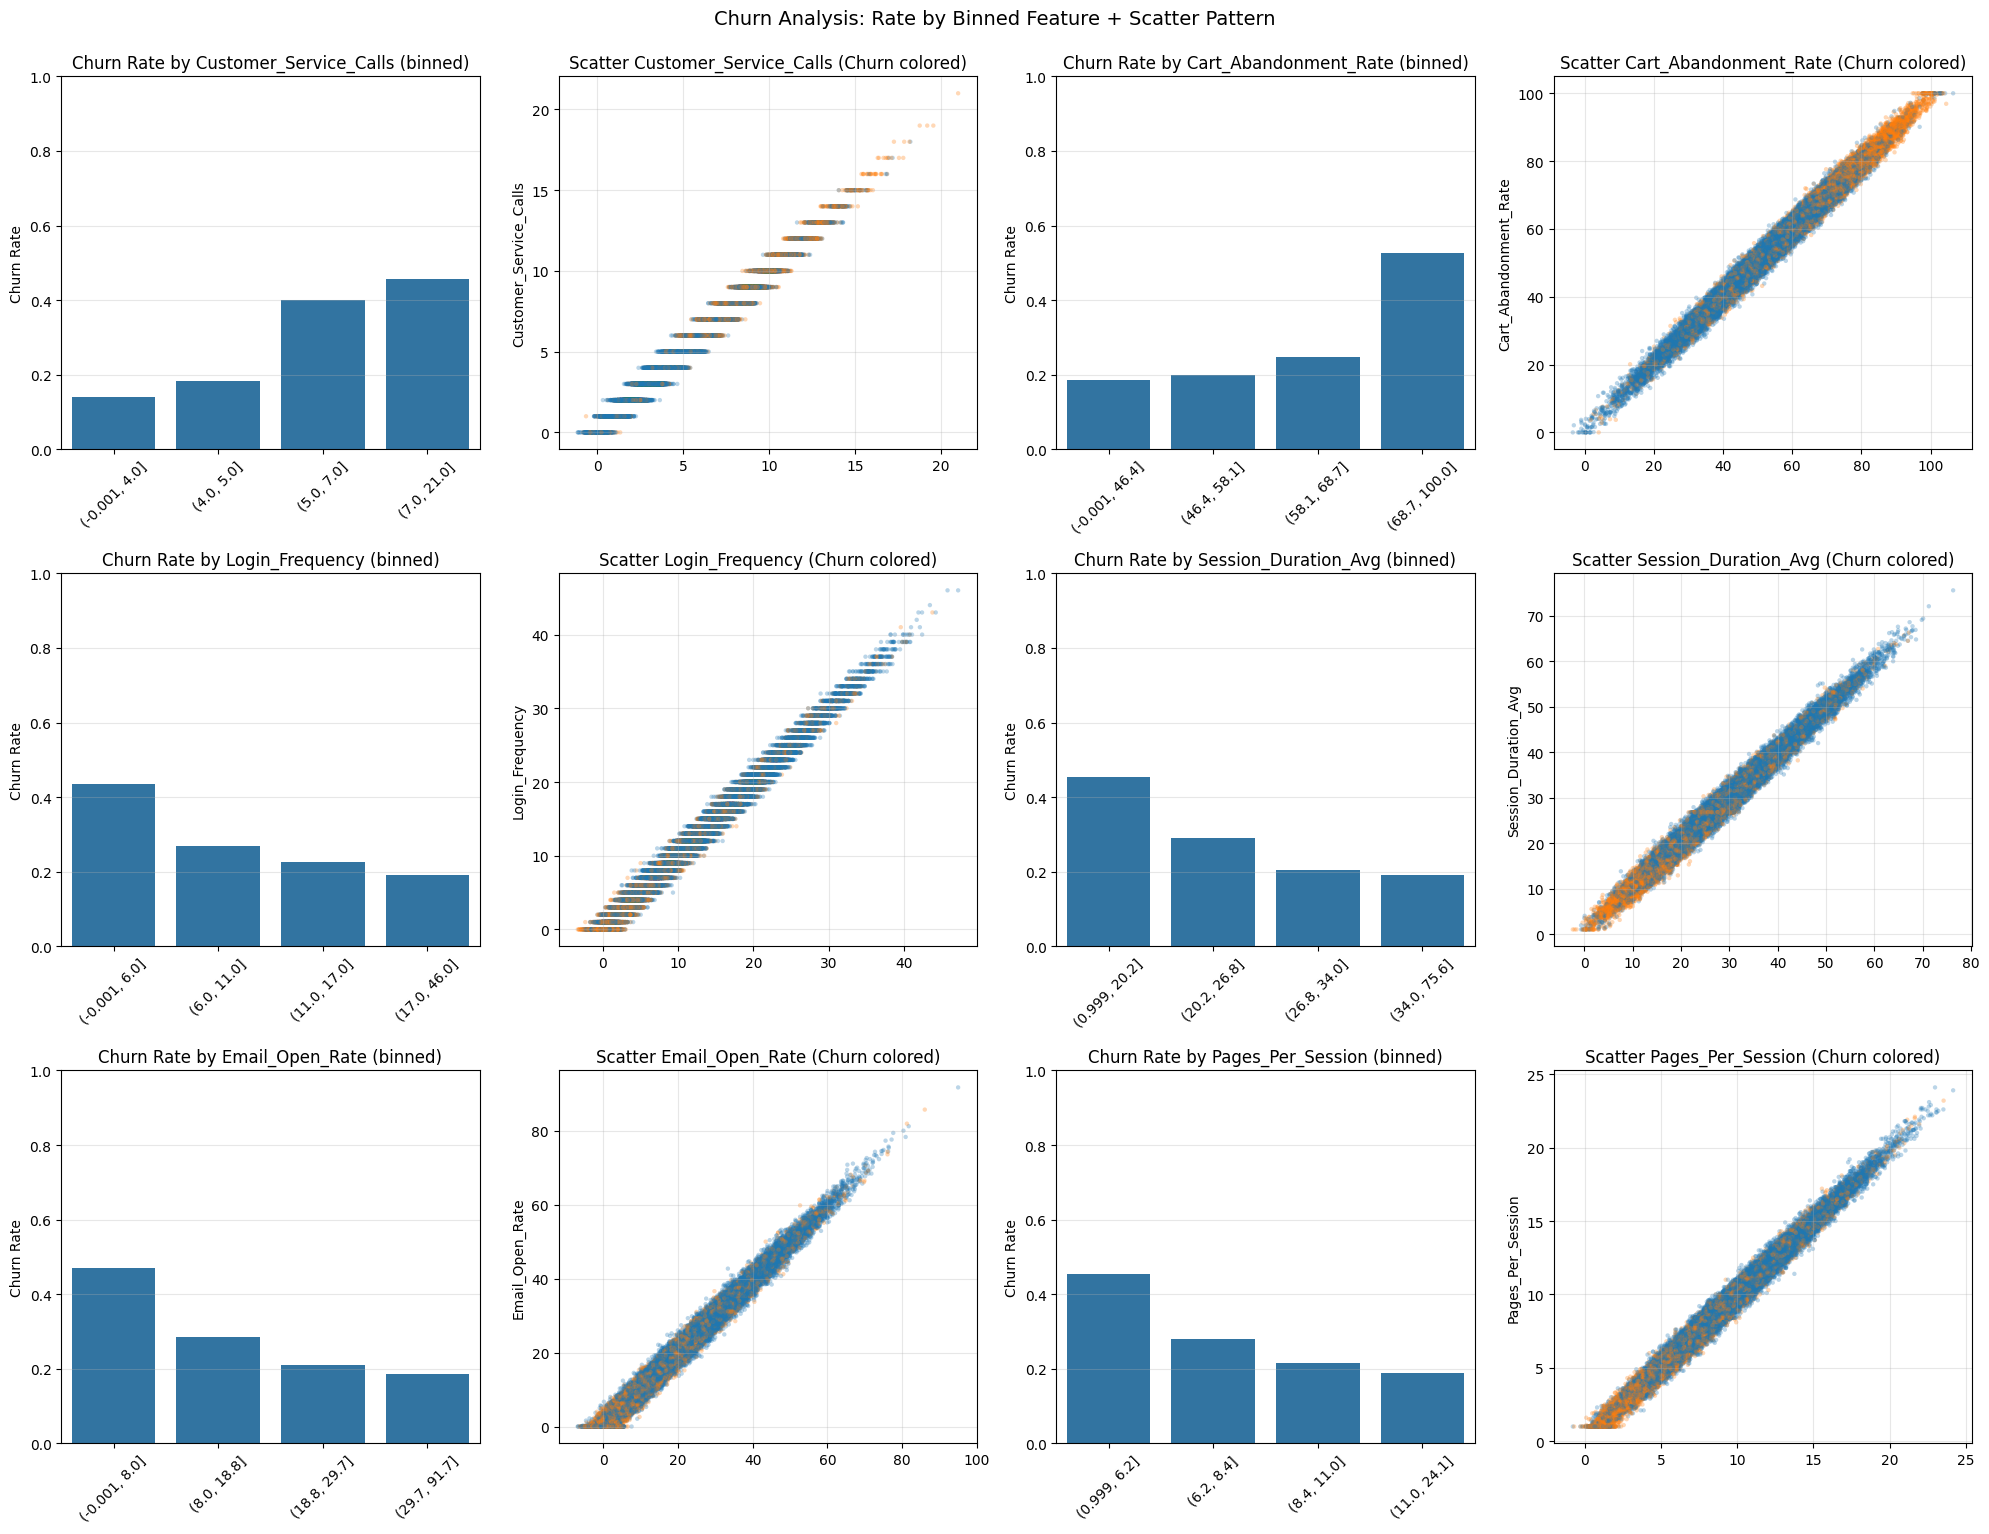

In [17]:
# Section 1: Correlation with target variable and choosing threshold (strong corr)

churn_corr = df.corr(numeric_only=True)[['Churned']].sort_values('Churned', ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Churn")
plt.show()

threshold = 0.2

imp = churn_corr[(abs(churn_corr['Churned']) >= threshold) & (churn_corr.index != 'Churned')].index.tolist()
print("\n Features |corr| >= threshold:", imp)
print("\n")

# Section 2: Plot: Barplot % Churn + Scatter
# ────────────────────────────────────────────────

num_features = len(imp)
pairs_per_row = 2
n_cols = pairs_per_row * 2
n_rows = math.ceil(num_features / pairs_per_row)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(imp):
    row_idx = i // pairs_per_row
    pair_idx = i % pairs_per_row

    # Barlot % Churned
    bar_pos = row_idx * n_cols + pair_idx * 2 + 1
    plt.subplot(n_rows, n_cols, bar_pos)

    # Binning with quantile
    df_bin = df[[col, 'Churned']].dropna().copy()
    df_bin['bin'] = pd.qcut(df_bin[col], q=4, duplicates='drop')

    churn_rate = (
        df_bin
        .groupby('bin')['Churned']
        .mean()
        .reset_index()
    )

    sns.barplot(
        data=churn_rate,
        x='bin',
        y='Churned',
        # palette='viridis'
    )

    plt.title(f"Churn Rate by {col} (binned)")
    plt.ylabel("Churn Rate")
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', alpha=0.3)

    # Ploting scatter
    scatter_pos = row_idx * n_cols + pair_idx * 2 + 2
    plt.subplot(n_rows, n_cols, scatter_pos)

    df_full = df[[col, 'Churned']].copy()
    jitter_strength = 0.02 * (df_full[col].max() - df_full[col].min())
    df_full['x_jitter'] = df_full[col] + np.random.normal(0, jitter_strength, len(df_full))

    sns.scatterplot(
        data=df_full,
        x='x_jitter',
        y=col,
        hue='Churned',
        alpha=0.3,
        s=10,
        edgecolor='none',
        legend=False
    )

    plt.title(f"Scatter {col} (Churn colored)")
    plt.xlabel("")
    plt.ylabel(col)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle(
    "Churn Analysis: Rate by Binned Feature + Scatter Pattern",
    y=1.02,
    fontsize=14
)
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Clear behavioral breakpoints</strong><br>
Churn is driven by non-linear behavioral effects, with sharp risk increases after specific thresholds rather than smooth linear trends.<br>
Clear behavioral breakpoints are observed across service friction, abandonment, and engagement metrics.<br><br>
<strong>==> These breakpoints form a natural foundation for behavior-based customer segmentation.</strong>
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
3. Correlation analysis between category variables and the target variable ("Churned")
</div>

In [18]:
category_var = df.select_dtypes(include=['object']).columns.drop("Customer_id")
print("category variable:", list(category_var ))

category variable: ['Gender', 'Country', 'City', 'Signup_Quarter']


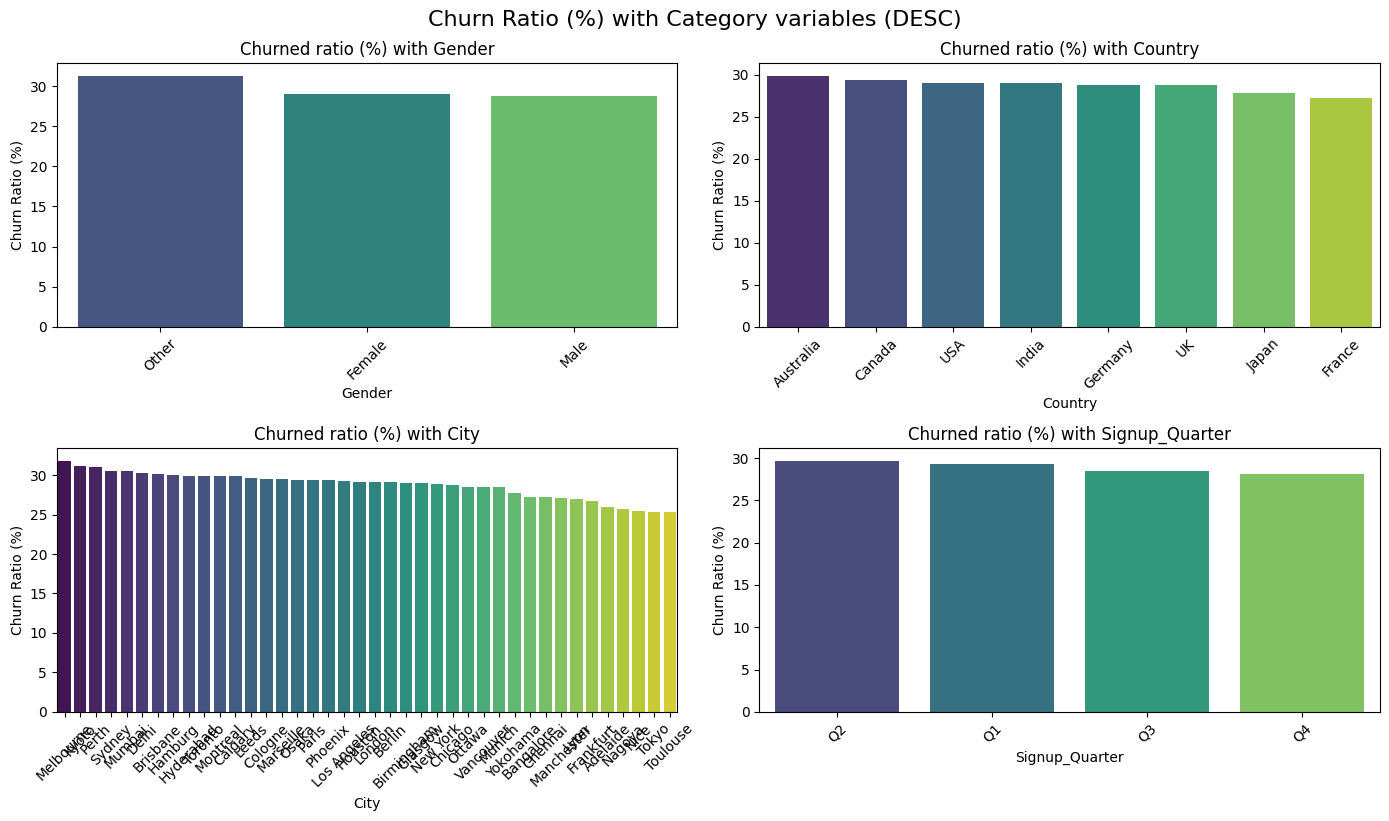

In [19]:
n_cols = 2
n_rows = (len(category_var) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, cat in enumerate(category_var):

    # Grouping 'Churned' ratio
    churn_rate = df.groupby(cat)['Churned'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=False).reset_index()

    # Ploting barplot
    sns.barplot(
        data=churn_rate,
        x=cat,
        y='Churned',
        palette='viridis',
        ax=axes[i]
    )

    axes[i].set_title(f'Churned ratio (%) with {cat}')
    axes[i].set_ylabel('Churn Ratio (%)')
    axes[i].set_xlabel(cat)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Churn Ratio (%) with Category variables (DESC)", y=1.02, fontsize=16)
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
A quick check shows that Churned is not strongly dependent on demographic factors.
</div>

<div style="
    background:#1f77b4;
    color:white;
    padding:15px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
III/ HYPOTHESIS TESTING
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:0px;
">
1. Continuous variables
</div>

In [21]:
# Split data  (80% train, 20% test) 
train_df, test_df = train_test_split( 
    df, 
    test_size=0.2, 
    random_state=42, 
    stratify=df['Churned'] )

In [22]:
# Caculating Mann-Whitney + effect size (rank-biserial r)
def mann_whitney_effect_size(group1, group2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    r = 1 - (2 * stat) / (n1 * n2) if n1 * n2 != 0 else 0  # rank-biserial r
    return p, abs(r)

# List numerical features
numerical_features = [  
                        "Customer_Service_Calls",
                        "Session_Duration_Avg",
                        "Login_Frequency",
                        "Email_Open_Rate",
                        "Cart_Abandonment_Rate",
                        "Pages_Per_Session",
                        "Total_Purchases",
                        "Social_Media_Engagement_Score",
                        "Mobile_App_Usage"
                    ]
results = []

for feature in numerical_features:
    # Train set
    train_churn = train_df[train_df['Churned'] == 1][feature].dropna()
    train_non_churn = train_df[train_df['Churned'] == 0][feature].dropna()
    train_p, train_r = mann_whitney_effect_size(train_churn, train_non_churn)
    
    # Test set
    test_churn = test_df[test_df['Churned'] == 1][feature].dropna()
    test_non_churn = test_df[test_df['Churned'] == 0][feature].dropna()
    test_p, test_r = mann_whitney_effect_size(test_churn, test_non_churn)
    
    results.append({
        'Feature': feature,
        'Train_p_value': train_p,
        'Train_rank_r': train_r,
        'Test_p_value': test_p,
        'Test_rank_r': test_r,
        'Consistent': 'Yes' if (train_p < 0.05) == (test_p < 0.05) else 'No'
    })

# Transform to Dataframe and display
result_df = pd.DataFrame(results)
result_df['Train_p_value'] = result_df['Train_p_value'].apply(
    lambda x: f"{x:.2e}" if x < 0.001 else f"{x:.3f}")
result_df['Test_p_value'] = result_df['Test_p_value'].apply(
    lambda x: f"{x:.2e}" if x < 0.001 else f"{x:.3f}")
result_df = result_df.sort_values('Train_rank_r', ascending=False)

display(result_df)

,Feature,Train_p_value,Train_rank_r,Test_p_value,Test_rank_r,Consistent
0,Customer_Service_Calls,0.00e+00,0.370603,6.88e-212,0.393159,Yes
4,Cart_Abandonment_Rate,0.00e+00,0.354447,5.11e-176,0.360289,Yes
3,Email_Open_Rate,0.00e+00,0.297452,2.12e-130,0.309156,Yes
5,Pages_Per_Session,0.00e+00,0.287876,4.58e-122,0.299196,Yes
1,Session_Duration_Avg,0.00e+00,0.277288,1.95e-115,0.290824,Yes
2,Login_Frequency,0.00e+00,0.269785,1.84e-106,0.278875,Yes
6,Total_Purchases,2.72e-301,0.236101,2.08e-87,0.252238,Yes
8,Mobile_App_Usage,7.14e-299,0.235169,1.08e-80,0.242162,Yes
7,Social_Media_Engagement_Score,9.16e-241,0.210208,1.20e-68,0.222086,Yes


<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
">
2. Category variables
</div>

In [23]:
# Caculating Chi_square + effect size (Cramers_V)
def chi_square_cramers_v(df, feature, target='Churned'):
    contingency = pd.crosstab(df[feature], df[target])
    
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        return np.nan, np.nan    
    chi2, p, _, _ = chi2_contingency(contingency)    
    n = contingency.sum().sum()
    r, k = contingency.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return p, cramers_v
    
categorical_features = [
                        "Gender",
                        "City",
                        "Country",
                        ]
cat_results = []

for feature in categorical_features:
    # Train set
    train_p, train_v = chi_square_cramers_v(train_df, feature)
    
    # Test set
    test_p, test_v = chi_square_cramers_v(test_df, feature)
    
    cat_results.append({
        "Feature": feature,
        "Train_p_value": train_p,
        "Train_Cramers_V": train_v,
        "Test_p_value": test_p,
        "Test_Cramers_V": test_v,
        "Consistent": "Yes" if (train_p < 0.05) == (test_p < 0.05) else "No"
    })

cat_result_df = pd.DataFrame(cat_results)

# Transform to Dataframe and display
cat_result_df["Train_p_value"] = cat_result_df["Train_p_value"].apply(
    lambda x: f"{x:.2e}" if pd.notnull(x) and x < 0.001 else f"{x:.3f}")
cat_result_df["Test_p_value"] = cat_result_df["Test_p_value"].apply(
    lambda x: f"{x:.2e}" if pd.notnull(x) and x < 0.001 else f"{x:.3f}")
cat_result_df = cat_result_df.sort_values("Train_Cramers_V", ascending=False)

display(cat_result_df)

,Feature,Train_p_value,Train_Cramers_V,Test_p_value,Test_Cramers_V,Consistent
1,City,0.267,0.033178,0.742,0.057385,Yes
2,Country,0.117,0.016975,0.745,0.020720,Yes
0,Gender,0.477,0.006081,0.211,0.017638,Yes


<div style="
    background:#1f77b4;
    color:white;
    padding:15px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
CONSLUTION
</div>

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Customer engagement</strong> is uneven: most customers have low–moderate activity, while a small group shows very high usage.<br><br>
<strong>Engagement variables</strong> move together, indicating a shared behavioral pattern rather than independent actions.<br><br>
<strong>Churn</strong> relates to behavior in a non-linear way, staying stable at low levels but increasing sharply after certain thresholds. Demographics do not affect churn.<br>
<em>(Ex: Customers with Customer Service Calls above the median have a churn rate of approximately 43%, nearly 3 times higher than the low-call group ~15%)</em><br><br>
<strong>Distinct behavioral breakpoints</strong> exist, suggesting churn is triggered by crossing engagement and experience thresholds, not gradual decline.
</div>

<div style="
    background:#1f77b4;
    color:white;
    padding:15px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
PREPARE DATA FOR MODELING
</div>

In [24]:
features_for_vif = [
    "Customer_Service_Calls",
    "Cart_Abandonment_Rate",
    "Email_Open_Rate",
    "Pages_Per_Session",
    "Session_Duration_Avg",
    "Login_Frequency",
    "Total_Purchases",
    "Mobile_App_Usage",
    "Social_Media_Engagement_Score"
]

X = train_df[features_for_vif].dropna()
X_scaled = StandardScaler().fit_transform(X)

vif_df = pd.DataFrame()
vif_df["Feature"] = features_for_vif
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled, i)
    for i in range(X_scaled.shape[1])
]

display(vif_df.sort_values("VIF", ascending=False))


,Feature,VIF
4,Session_Duration_Avg,3.103320
3,Pages_Per_Session,2.639144
5,Login_Frequency,2.413067
1,Cart_Abandonment_Rate,2.315165
2,Email_Open_Rate,2.101420
6,Total_Purchases,1.961580
7,Mobile_App_Usage,1.733232
8,Social_Media_Engagement_Score,1.560243
0,Customer_Service_Calls,1.240897


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
The entire set of variables that passed the statistical test remains unchanged, as there is no significant multicollinearity.
</div>

In [25]:
id_col = "Customer_id"
target_col = "Churned"

scale_cols = [
    "Customer_Service_Calls",
    "Session_Duration_Avg",
    "Login_Frequency",
    "Email_Open_Rate",
    "Cart_Abandonment_Rate",
    "Pages_Per_Session",
    "Total_Purchases",
    "Social_Media_Engagement_Score",
    "Mobile_App_Usage"
]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[scale_cols])

scaled_df = pd.DataFrame(
    scaled_features,
    columns=scale_cols,
    index=df.index
)

final_df = pd.concat(
    [
        df[[id_col]],  
        scaled_df,         
        df[[target_col]]   
    ],
    axis=1
)

final_df.head()

,Customer_id,Customer_Service_Calls,Session_Duration_Avg,Login_Frequency,Email_Open_Rate,Cart_Abandonment_Rate,Pages_Per_Session,Total_Purchases,Social_Media_Engagement_Score,Mobile_App_Usage,Churned
0,6606de2c-7ddd-46cb-9a5d-580f9b38a2c5,1.239842,-0.019266,0.304118,-0.135336,-0.398266,-0.741695,-0.587645,-0.443136,0.315737,0
1,f544f2f8-ae10-422c-b681-7075f3de2b49,0.496812,1.438275,0.432150,1.567168,-1.192560,0.431898,0.911246,-1.200217,0.550273,0
2,727a4e02-9914-43ff-a6e9-2f5c58645174,-0.617733,-0.266953,-0.208008,-1.359224,0.851669,-1.942582,-0.573370,-1.200217,-0.810035,0
3,a29e2097-3fa8-40c1-aca8-037b26b81274,-1.360762,1.028639,-0.208008,1.471445,-0.946268,1.660078,0.268864,2.789556,1.272644,0
4,154034dc-56cc-4f77-b335-74e9e7a754eb,-1.732277,2.267073,2.224591,1.232137,-2.337821,-0.086666,2.767017,2.654860,3.092644,0


In [26]:
final_df.to_csv("churn_model_input_scaled.csv", index=False)